## Title: Walmart Sales Forcasting

### Problem Statement
Predicting sales in stores during festive season (Super Bowl, Labour Day, Thanksgiving, Christmas) based on departments.


## Dataset:
### Walmart Sales Forecasting (https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting/data)


## Description: 
### The data consists of historical sales data for 45 Walmart stores located in different regions.  Each store contains a number of departments, and the task is to predict the department-wide sales for each store.
### 1. Train data has 421571 rows and 5 columns
### 2. Test data has 115065 rows and 4 columns
### 3. Features data has 8191 rows and 12 columns
### 4. Stores data has 46 rows and 3 columns







In [1]:
import pandas as pd
import seaborn as sns
import numpy 
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


###  Reading csv files(store.csv,train.csv,test.csv,features.csv)

In [13]:
dfStore =pd.read_csv('stores.csv')

dfTrain = pd.read_csv('train.csv')

dfTest =pd.read_csv('test.csv')

dfFeatures =pd.read_csv('features.csv')

#submission = pd.read_csv('sampleSubmission.csv')

## Pre-processing

### Merging train with store dataset and test with store dataset :
#### Description : The merging of these datasets will help to find the variation of Type of store i.e. A,B,C based on Weekly_Sales.

In [14]:
df_train = pd.merge(dfTrain, dfStore)
df_test=pd.merge(dfTest,dfStore)

In [15]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,05-02-2010,24924.50,False,A,151315
1,1,1,12-02-2010,46039.49,True,A,151315
2,1,1,19-02-2010,41595.55,False,A,151315
3,1,1,26-02-2010,19403.54,False,A,151315
4,1,1,05-03-2010,21827.90,False,A,151315


In [16]:
df_test.head()

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315
3,1,1,2012-11-23,True,A,151315
4,1,1,2012-11-30,False,A,151315


### Merging train with features and  Merging test with Features :
#### Description : These merging of datasets will help to find the variation of Markdowns[1-5], CPI and Unemployment with respect to Weekly_Sales.


In [17]:
train=pd.merge(df_train, dfFeatures,how='left')

test = pd.merge(df_test, dfFeatures,how='left')


In [18]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05-02-2010,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,12-02-2010,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,19-02-2010,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26-02-2010,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05-03-2010,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [19]:
test.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2012-11-09,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,2012-11-16,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,2012-11-23,True,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,2012-11-30,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Fixing date formats in Pandas - to_datetime
### Change dates to specific format

In [20]:

train['Date'] = pd.to_datetime(train['Date'], format='%d-%m-%Y')
test['Date'] = pd.to_datetime(test['Date'], format='%Y-%m-%d')

### Seperating Date column on basis of day, month and year and Conversion of categorical into numerical data :
#### Description : This seperation of date into day, month and year will help to calculate the number of holidays.

In [21]:

train['day_Date'] = train['Date'].dt.day
train['month_Date'] = train['Date'].dt.month
train['year_Date'] = train['Date'].dt.year
test['day_Date'] = test['Date'].dt.day
test['month_Date'] = test['Date'].dt.month
test['year_Date'] = test['Date'].dt.year
test.drop('Date',axis=1,inplace=True)


In [22]:
#weight certain features more by duplication, not sure if helpful?

#train$tDays = 360*(train$year-2010) + (train$month-1)*30 + train$day

#train$days30 = (train$month-1)*30 + train$day
train['numberofdays']=360*(train['year_Date']-2010)+(train['month_Date']-1)*30+train['day_Date']

In [23]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day_Date,month_Date,year_Date,numberofdays
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,35
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,12,2,2010,42
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,19,2,2010,49
3,1,1,2010-02-26,19403.54,False,A,151315,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,26,2,2010,56
4,1,1,2010-03-05,21827.90,False,A,151315,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,5,3,2010,65
5,1,1,2010-03-12,21043.39,False,A,151315,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,12,3,2010,72
6,1,1,2010-03-19,22136.64,False,A,151315,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,19,3,2010,79
7,1,1,2010-03-26,26229.21,False,A,151315,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,26,3,2010,86
8,1,1,2010-04-02,57258.43,False,A,151315,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,2,4,2010,92
9,1,1,2010-04-09,42960.91,False,A,151315,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,9,4,2010,99


#### Description : Conversion of categorical (Type column) into numerical data i.e. A-1, B-2 and C-3

In [24]:

train['days'] = (train['month_Date']-1)*30 + train['day_Date']
train.Type.replace("A", 1, inplace=True)
train.Type.replace("B", 2, inplace=True)
train.Type.replace("C", 3, inplace=True)
train['dayHoliday'] = train['IsHoliday']*train['days']

In [25]:

test['days'] = (test['month_Date']-1)*30 + test['day_Date']
test.Type.replace("A", 1, inplace=True)
test.Type.replace("B", 2, inplace=True)
test.Type.replace("C", 3, inplace=True)
test['dayHoliday'] = test['IsHoliday']*test['days']

### Working on CPI


#### Description : The CPI i.e. Customer Price Index column has whether null values or not null values or both.The Nan values are replaced by -1.

In [13]:
##filling Nan values with -1
train['CPI'].fillna(-1, inplace = True)
##calculating number of null values
nullCPI = train['CPI'] != -1
nullCPIvalues=sum(train['CPI']== -1)
print nullCPIvalues
notnullCPIvalues=sum(train['CPI']!= -1)
print notnullCPIvalues

0
421570


#### Inference : The CPI column does not have any null values.

### Graph plotting for CPI values

#### Description : A graph is plotted that shows the Number of null values and not null values in CPI column i.e. 0 : Count of null Values, 1 : Count of not null Values.

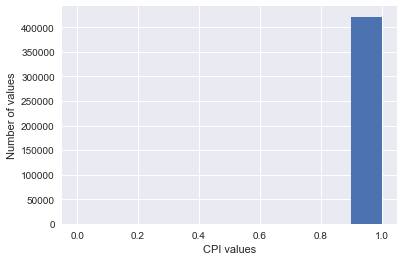

In [14]:
##graph to check number of null values and number of not null values
plt.hist(nullCPI,range=(0,1))
plt.xlabel('CPI values')
plt.ylabel('Number of values')
plt.show() 

#### Inference : The graph shows that there are no null values.

### Working on Unemployment

#### Description : The unemployment column consists of Nan values or not Nan values or both.The Nan values are replaced by -1.

In [15]:
##Replacing Nan values with -1
train['Unemployment'].fillna(-1, inplace = True)
##Total number of Nan values
nullUnemployment = train['Unemployment'] != -1
null_values=sum(train['Unemployment'] == -1)
notnull_values=sum(train['Unemployment'] != -1)
print null_values
print notnull_values


0
421570


#### Inference : The Unemployment column does not have any null values.

### Graph plotting for Unemployement values

#### Description : A graph is plotted that shows the Number of null values and not null values in Unemployment column i.e. 0 : Count of null Values, 1 : Count of not null Values.

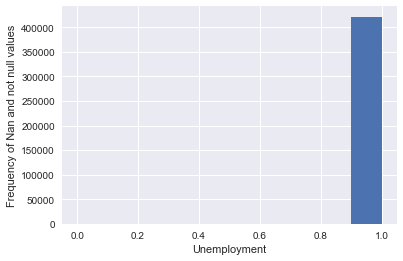

In [16]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullUnemployment,range=(0,1))
plt.xlabel('Unemployment')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

#### Inference: unemployment has no null vales

### Working on MarkDown
####  Description : We are using year wise data from features to fill the Markdown values with appropriate values (that is, average mean or -1) inplace of NaN.
#### Fetching of 2010, 2011 and 2012 data of Markdowns

In [17]:
#2010 records
users_2010 = train[train['Date'] >= '2010-01-01']
users_2010 = users_2010[users_2010['Date'] <= '2010-12-31']
users_2010
#2011 records
users_2011 = train[train['Date'] >= '2011-01-01']
users_2011 = users_2011[users_2011['Date'] <= '2011-12-31']
users_2011
#2012 records
users_2012 = train[train['Date'] >= '2012-01-01']
users_2012 = users_2012[users_2012['Date'] <= '2012-12-31']
users_2012



,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day_Date,month_Date,year_Date,days,dayHoliday
100,1,1,2012-01-06,16567.69,False,1,151315,49.01,3.157,6277.39,...,143.10,1450.13,8483.00,219.714258,7.348,6,1,2012,6,0
101,1,1,2012-01-13,16894.40,False,1,151315,48.53,3.261,5183.29,...,42.24,453.08,3719.38,219.892526,7.348,13,1,2012,13,0
102,1,1,2012-01-20,18365.10,False,1,151315,54.11,3.268,4139.87,...,33.88,500.62,3400.21,219.985689,7.348,20,1,2012,20,0
103,1,1,2012-01-27,18378.16,False,1,151315,54.26,3.290,1164.46,...,44.00,11.00,1222.19,220.078852,7.348,27,1,2012,27,0
104,1,1,2012-02-03,23510.49,False,1,151315,56.55,3.360,34577.06,...,160.53,32403.87,5630.40,220.172015,7.348,3,2,2012,33,0
105,1,1,2012-02-10,36988.49,True,1,151315,48.02,3.409,13925.06,...,101.64,8471.88,6886.04,220.265178,7.348,10,2,2012,40,40
106,1,1,2012-02-17,54060.10,False,1,151315,45.32,3.510,9873.33,...,9.80,8409.31,3402.66,220.425759,7.348,17,2,2012,47,0
107,1,1,2012-02-24,20124.22,False,1,151315,57.25,3.555,9349.61,...,3.20,1219.92,8143.59,220.636902,7.348,24,2,2012,54,0
108,1,1,2012-03-02,20113.03,False,1,151315,60.96,3.630,15441.40,...,10.80,25390.88,8067.61,220.848045,7.348,2,3,2012,62,0
109,1,1,2012-03-09,21140.07,False,1,151315,58.76,3.669,10331.04,...,6.00,671.43,5509.84,221.059189,7.348,9,3,2012,69,0


### Mardowns[1-5] values of year 2010

#### Description : Markdowns[1-5] may have null or not null or both values. The Nan values are replaced by -1. Total number of null and not null values are calculated.

In [18]:
##Replacing Nan values with -1
users_2010['MarkDown1'].fillna(-1, inplace = True)
users_2010['MarkDown2'].fillna(-1, inplace = True)
users_2010['MarkDown3'].fillna(-1, inplace = True)
users_2010['MarkDown4'].fillna(-1, inplace = True)
users_2010['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2010['MarkDown1'] != -1
nullMarkDown2 = users_2010['MarkDown2'] != -1
nullMarkDown3 = users_2010['MarkDown3'] != -1
nullMarkDown4 = users_2010['MarkDown4'] != -1
nullMarkDown5 = users_2010['MarkDown5'] != -1

null_values1=sum(users_2010['MarkDown1'] == -1)
null_values2=sum(users_2010['MarkDown2'] == -1)
null_values3=sum(users_2010['MarkDown3'] == -1)
null_values4=sum(users_2010['MarkDown4'] == -1)
null_values5=sum(users_2010['MarkDown5'] == -1)
print null_values1
print null_values2
print null_values3
print null_values4
print null_values5

140679
140679
140679
140679
140679


#### Inference : The Markdowns[1-5] of year 2010 has only null values. So Markdowns[1-5] cannot be used for finding variation with respect to Weekly_Sales

### Plotting graph for null values in 2010

#### Description : A graph is plotted that shows the Number of null values and not null values in Markdowns[1-5] columns i.e. 0 : Count of null Values, 1 : Count of not null Values.

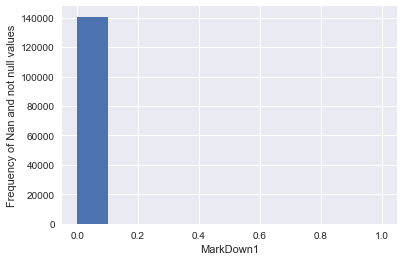

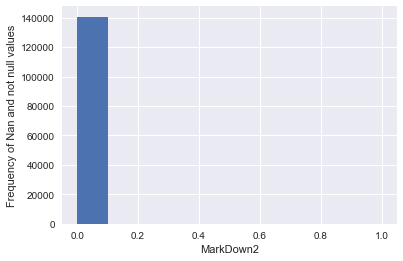

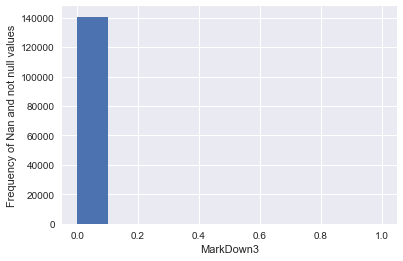

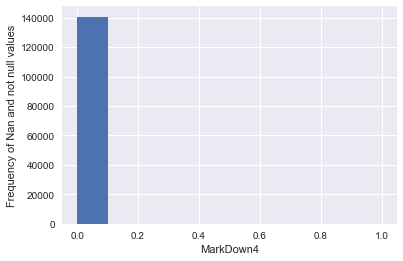

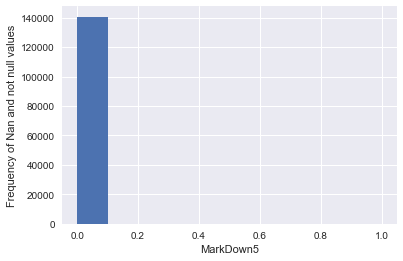

In [19]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

#### Inference : All the values are null for MarkDowns[1-5] in the year 2010

### Mardowns[1-5] values of year 2011

#### Description : Mardowns[1-5] column may have null, not null or both values. The null values are replaced by -1. Total number of null values and not null values are calculated.

In [20]:
##Replacing Nan values with -1
users_2011['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2011['MarkDown1'] != -1
null1=sum(users_2011['MarkDown1'] == -1)
print null1
users_2011['MarkDown2'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown2 = users_2011['MarkDown2'] != -1
null2=sum(users_2011['MarkDown2'] == -1)
print null2
users_2011['MarkDown3'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown3 = users_2011['MarkDown3'] != -1
null3=sum(users_2011['MarkDown3'] == -1)
print null3
users_2011['MarkDown4'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown4 = users_2011['MarkDown4'] != -1
null4=sum(users_2011['MarkDown4'] == -1)
print null4
users_2011['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown5 = users_2011['MarkDown5'] != -1
null5=sum(users_2011['MarkDown5'] == -1)
print null5

129753
133299
130337
132411
129459


#### Inference : The Markdown[1-5] values have highest number of null values and very less not null values comparatively. So Markdown[1-5] for year 2011 also cannot be used for finding the variation with respect to Weekly_Sales.

### Plotting graph for null values in 2011

#### Description : A graph is plotted that shows the Number of null values and not null values in Markdowns[1-5] columns i.e. 0 : Count of null Values, 1 : Count of not null Values

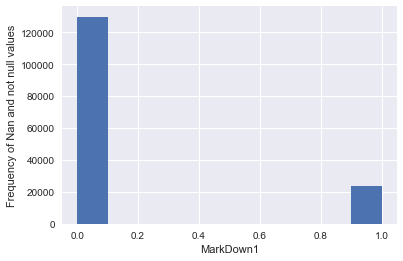

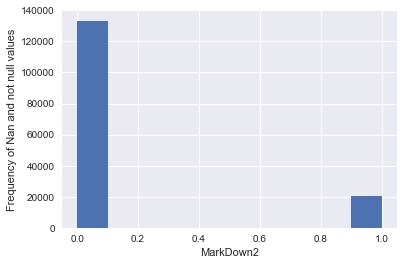

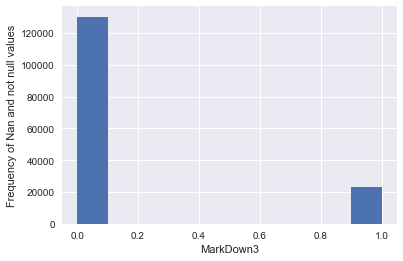

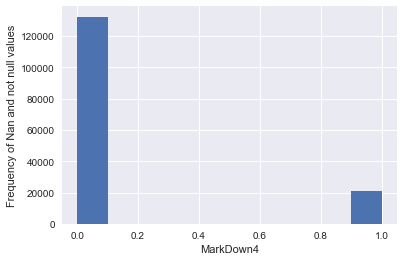

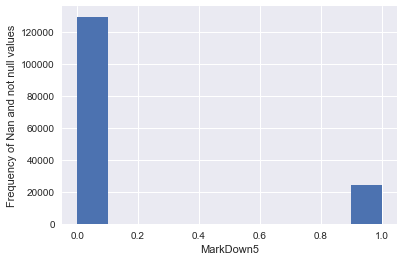

In [21]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

####  Inference: We have very large null values for MarkDown[1-5] in the year 2011

### Mardowns[1-5] values of year 2012

#### Description : Mardowns[1-5] column may have null, not null or both values. The null values are replaced by -1. Total number of null values and not null values are calculated

In [22]:
##Replacing Nan values with -1
users_2012['MarkDown1'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown1 = users_2012['MarkDown1'] != -1
null1=sum(users_2012['MarkDown1'] == -1)
print null1
##Replacing Nan values with -1
users_2012['MarkDown2'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown2 = users_2012['MarkDown2'] != -1
null2=sum(users_2012['MarkDown2'] == -1)
print null2
##Replacing Nan values with -1
users_2012['MarkDown3'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown3 = users_2012['MarkDown3'] != -1
null3=sum(users_2012['MarkDown3'] == -1)
print null3
##Replacing Nan values with -1
users_2012['MarkDown4'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown4 = users_2012['MarkDown4'] != -1
null4=sum(users_2012['MarkDown4'] == -1)
print null4
##Replacing Nan values with -1
users_2012['MarkDown5'].fillna(-1, inplace = True)
##Total number of Nan values
nullMarkDown5 = users_2012['MarkDown5'] != -1
null5=sum(users_2012['MarkDown5'] == -1)
print null5

457
36344
13533
13513
0


#### Inference : The Markdown[1-5] values have limited null values.

### Plotting graph for null values in 2012

#### Description : A graph is plotted that shows the Number of null values and not null values in Markdowns[1-5] columns i.e. 0 : Count of null Values, 1 : Count of not null Values

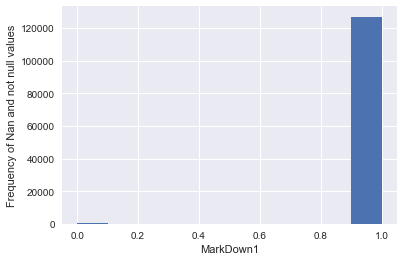

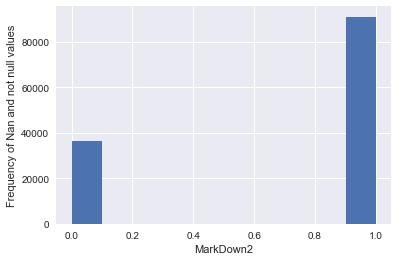

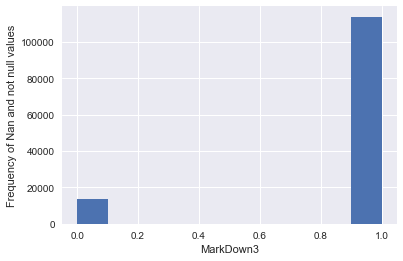

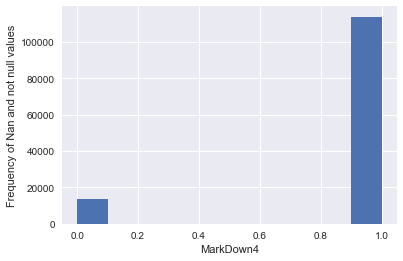

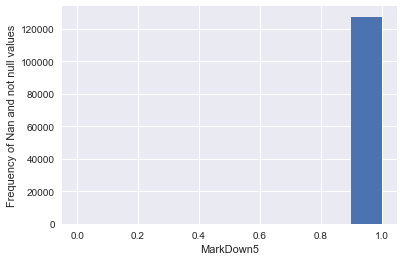

In [23]:
##Graph that shows the frequency of Nan and not null values
plt.hist(nullMarkDown1,range=(0,1))
plt.xlabel('MarkDown1')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown2,range=(0,1))
plt.xlabel('MarkDown2')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown3,range=(0,1))
plt.xlabel('MarkDown3')
plt.ylabel('Frequency of Nan and not null values')
plt.show() 
plt.hist(nullMarkDown4,range=(0,1))
plt.xlabel('MarkDown4')
plt.ylabel('Frequency of Nan and not null values')
plt.show()
plt.hist(nullMarkDown5,range=(0,1))
plt.xlabel('MarkDown5')
plt.ylabel('Frequency of Nan and not null values')
plt.show()

#### Inference: we have limited null values as compared to the not null values for MarkDown[1-5] in the year 2012

### Conclusion : Since large number of Markdown values are null. It cannot be used to predict sales for Walmart Stores.

## Data Visualisation

### Working on Store Type

#### Description : Fetching of Weekly_Sales affected on the type of Store. The Weekly_Sales is fetched according to the group of Type of Store. Each group created, the sum of Weekly_Sales is calculated(in percentage).

In [24]:
##Finding sum of weekly sales based on group and displaying it in a column TotalCount_Type
Total = train['Weekly_Sales'].sum()
percent=100/Total
train['TotalCount_Type'] = train.groupby('Type')['Weekly_Sales'].transform(sum)*percent

In [25]:
##Finding percentage of sales in each of the type 
Group_type = train['Weekly_Sales'].groupby(train['Type'])
Type_percent=Group_type.sum()*percent
Type_percent


Type
1    64.284903
2    29.696240
3     6.018856
Name: Weekly_Sales, dtype: float64

#### Inference : The Store type 1 has highest Weekly_Sales, followed by 2 and then 3.

### Plotting of Graph for Weekly_Sales on Store Type

#### Description : A graph is plotted on total Weekly_Sales grouped by Store type.

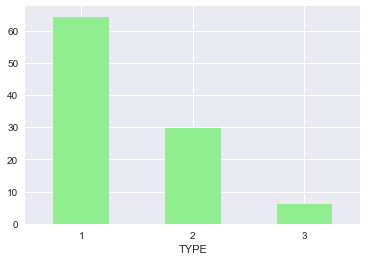

In [26]:
Type_percent.plot(kind='bar', color='lightgreen', rot=0)
plt.xlabel('TYPE')
sns.despine()
##df2.plot(figsize=(20,10))

#### Inference : Type Store A has highest sales, followed by B and the C.

### Working on Store

#### Description : Fetching of Weekly_Sales affected on the Store. The Weekly_Sales is fetched according to the group of Store. Each group created, the sum of Weekly_Sales is calculated(in percentage).

In [27]:
train['TotalCount_Store'] = train.groupby('Store')['Weekly_Sales'].transform(sum)*percent
train

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown5,CPI,Unemployment,day_Date,month_Date,year_Date,days,dayHoliday,TotalCount_Type,TotalCount_Store
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,NaN,...,NaN,211.096358,8.106,5,2,2010,35,0,64.284903,3.301107
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,NaN,...,NaN,211.242170,8.106,12,2,2010,42,42,64.284903,3.301107
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,NaN,...,NaN,211.289143,8.106,19,2,2010,49,0,64.284903,3.301107
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,NaN,...,NaN,211.319643,8.106,26,2,2010,56,0,64.284903,3.301107
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,NaN,...,NaN,211.350143,8.106,5,3,2010,65,0,64.284903,3.301107
5,1,1,2010-03-12,21043.39,False,1,151315,57.79,2.667,NaN,...,NaN,211.380643,8.106,12,3,2010,72,0,64.284903,3.301107
6,1,1,2010-03-19,22136.64,False,1,151315,54.58,2.720,NaN,...,NaN,211.215635,8.106,19,3,2010,79,0,64.284903,3.301107
7,1,1,2010-03-26,26229.21,False,1,151315,51.45,2.732,NaN,...,NaN,211.018042,8.106,26,3,2010,86,0,64.284903,3.301107
8,1,1,2010-04-02,57258.43,False,1,151315,62.27,2.719,NaN,...,NaN,210.820450,7.808,2,4,2010,92,0,64.284903,3.301107
9,1,1,2010-04-09,42960.91,False,1,151315,65.86,2.770,NaN,...,NaN,210.622857,7.808,9,4,2010,99,0,64.284903,3.301107


In [28]:
##Finding percentage of sales in each of the Store 
Group_Store = train['Weekly_Sales'].groupby(train['Store'])
Store_percent=Group_Store.sum()*percent
Store_percent


Store
1     3.301107
2     4.087479
3     0.854755
4     4.446107
5     0.674992
6     3.321194
7     1.211157
8     1.928855
9     1.154619
10    4.031600
11    2.878974
12    2.141644
13    4.252759
14    4.289602
15    1.323004
16    1.102123
17    1.896660
18    2.302356
19    3.067065
20    4.473623
21    1.604785
22    2.183032
23    2.950039
24    2.879764
25    1.500043
26    2.128718
27    3.767963
28    2.809226
29    1.145006
30    0.930902
31    2.962853
32    2.476085
33    0.551566
34    2.052030
35    1.952151
36    0.792793
37    1.101385
38    0.818730
39    3.079098
40    2.046398
41    2.691644
42    1.180988
43    1.344255
44    0.642596
45    1.668275
Name: Weekly_Sales, dtype: float64

### Plotting of Graph for Weekly_Sales on Store

#### Description :  A graph is plotted on total Weekly_Sales grouped by Store.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]),
 <a list of 45 Text xticklabel objects>)

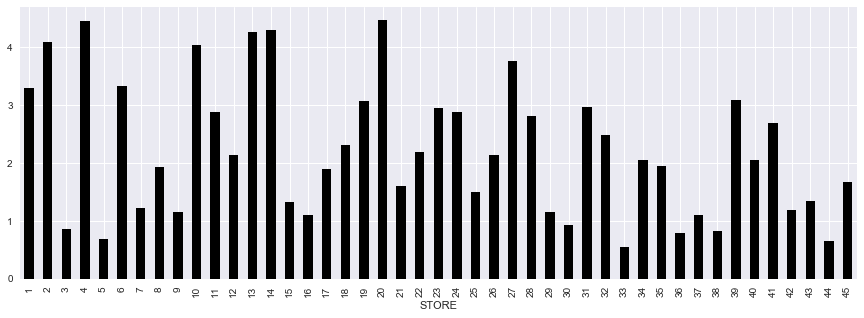

In [29]:
Store_percent.plot(kind='bar', color='black', rot=0,figsize = (15,5))

plt.xlabel('STORE')
sns.despine()
plt.xticks(rotation=90)

#### Inference : Store 4 and 20 has highest weekly sales with 4.473.

### Working on CPI (floor values)

#### Description : Fetching of Weekly_Sales affected on the CPI floor values. The Weekly_Sales is fetched according to the group of new CPI. Each group created, the sum of Weekly_Sales is calculated(in percentage).

In [30]:
train['New_CPI1'] = train['CPI'].apply(np.floor)


In [31]:
train['Weekly_Sales_per'] = train.groupby('New_CPI1')['Weekly_Sales'].transform(sum)*percent

In [32]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,Unemployment,day_Date,month_Date,year_Date,days,dayHoliday,TotalCount_Type,TotalCount_Store,New_CPI1,Weekly_Sales_per
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,NaN,...,8.106,5,2,2010,35,0,64.284903,3.301107,211.0,3.607505
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,NaN,...,8.106,12,2,2010,42,42,64.284903,3.301107,211.0,3.607505
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,NaN,...,8.106,19,2,2010,49,0,64.284903,3.301107,211.0,3.607505
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,NaN,...,8.106,26,2,2010,56,0,64.284903,3.301107,211.0,3.607505
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,NaN,...,8.106,5,3,2010,65,0,64.284903,3.301107,211.0,3.607505


In [33]:
Group_type = train['Weekly_Sales'].groupby(train['New_CPI1'])
Type_percent=Group_type.sum()*percent
Type_percent.head()


New_CPI1
126.0    8.080453
127.0    1.308851
128.0    1.692975
129.0    6.039524
130.0    5.251894
Name: Weekly_Sales, dtype: float64

### Plotting of Graph for Weekly_Sales on new CPI

#### Description :  A graph is plotted on total Weekly_Sales grouped by new CPI.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 62 Text xticklabel objects>)

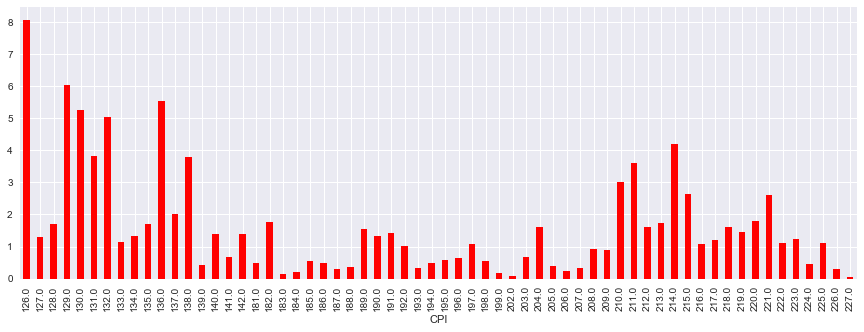

In [34]:
Type_percent.plot(kind='bar', color='red', rot=0,figsize = (15,5))
plt.xlabel('CPI')
sns.despine()

plt.xticks(rotation=90)

#### Inference : From above graph, we can infer that CPI is indirectly proportional to the Weekly_Sales. Therefore, CPI does not has positive effect on Weekly_Sales.

### Working on Department

#### Description : Fetching of Weekly_Sales affected on the Department. The Weekly_Sales is fetched according to the group of Department. Each group created, the sum of Weekly_Sales is calculated(in percentage).

In [35]:
train['TotalCount_Dept'] = train.groupby('Dept')['Weekly_Sales'].transform(sum)*percent
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,day_Date,month_Date,year_Date,days,dayHoliday,TotalCount_Type,TotalCount_Store,New_CPI1,Weekly_Sales_per,TotalCount_Dept
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,NaN,...,5,2,2010,35,0,64.284903,3.301107,211.0,3.607505,1.83516
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,NaN,...,12,2,2010,42,42,64.284903,3.301107,211.0,3.607505,1.83516
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,NaN,...,19,2,2010,49,0,64.284903,3.301107,211.0,3.607505,1.83516
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,NaN,...,26,2,2010,56,0,64.284903,3.301107,211.0,3.607505,1.83516
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,NaN,...,5,3,2010,65,0,64.284903,3.301107,211.0,3.607505,1.83516


In [36]:
##Finding percentage of sales in each of the Store 
Group_Dept = train['Weekly_Sales'].groupby(train['Dept'])
Dept_percent=Group_Dept.sum()*percent
Dept_percent.head()


Dept
1    1.835160
2    4.165089
3    1.126466
4    2.480946
5    2.012809
Name: Weekly_Sales, dtype: float64

### Plotting of Graph for Weekly_Sales based on Department

#### Description : The graph is plotted on total Weekly_Sales with respect to Department.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text xticklabel objects>)

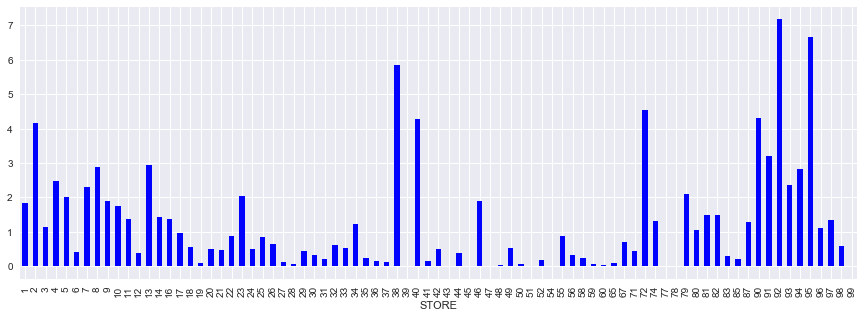

In [37]:
Dept_percent.plot(kind='bar', color='blue', rot=0, figsize = (15,5))

plt.xlabel('STORE')
sns.despine()
plt.xticks(rotation=90)

#### Inference : From above graph we infer that, the department number 92 has the highest weekly sales.

### Sorting train dataset according Store, Department, Date

In [21]:

train=train.sort_values(['Store','Dept','Date'])
train.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,...,MarkDown4,MarkDown5,CPI,Unemployment,day_Date,month_Date,year_Date,abc,days,dayHoliday
0,1,1,2010-02-05,24924.50,False,1,151315,42.31,2.572,NaN,...,NaN,NaN,211.096358,8.106,5,2,2010,35,35,0
1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,NaN,...,NaN,NaN,211.242170,8.106,12,2,2010,42,42,42
2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,NaN,...,NaN,NaN,211.289143,8.106,19,2,2010,49,49,0
3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,NaN,...,NaN,NaN,211.319643,8.106,26,2,2010,56,56,0
4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,NaN,...,NaN,NaN,211.350143,8.106,5,3,2010,65,65,0


### Calculating previous weekly sales in train dataset

#### Description : Predicting the Weekly_Sales based on previous weekly sales.

In [26]:
 
prevweeklysales = train[0:421570]
##prevweeklysales
prevweeklysales.drop(['Store', 'Dept', 'Date', 'IsHoliday', 'Type',
       'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'day_Date', 'month_Date', 'days', 'dayHoliday'], axis = 1, inplace = True)

prevweeklysales.rename(columns = {'Weekly_Sales':'previoussales'}, inplace=True)

train2 = train[1:(train['Weekly_Sales'].size)]

train2 = train2.reset_index()
prevweeklysales = prevweeklysales.reset_index()
train2['prevsales']= prevweeklysales['previoussales']
prevweeklysales
train2.head()

C:\Users\bhadra\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\bhadra\Anaconda2\lib\site-packages\pandas\core\frame.py:2844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,index,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,...,MarkDown5,CPI,Unemployment,day_Date,month_Date,year_Date,numberofdays,days,dayHoliday,prevsales
0,1,1,1,2010-02-12,46039.49,True,1,151315,38.51,2.548,...,NaN,211.242170,8.106,12,2,2010,42,42,42,24924.50
1,2,1,1,2010-02-19,41595.55,False,1,151315,39.93,2.514,...,NaN,211.289143,8.106,19,2,2010,49,49,0,46039.49
2,3,1,1,2010-02-26,19403.54,False,1,151315,46.63,2.561,...,NaN,211.319643,8.106,26,2,2010,56,56,0,41595.55
3,4,1,1,2010-03-05,21827.90,False,1,151315,46.50,2.625,...,NaN,211.350143,8.106,5,3,2010,65,65,0,19403.54
4,5,1,1,2010-03-12,21043.39,False,1,151315,57.79,2.667,...,NaN,211.380643,8.106,12,3,2010,72,72,0,21827.90


### Calculating previous weekly sales in test dataset

#### Description : Predicting the Weekly_Sales based on previous weekly sales.

In [27]:
 
prevweeklysales = test[0:421570]
##prevweeklysales
prevweeklysales.drop([ 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'day_Date', 'month_Date', 'days', 'dayHoliday','year_Date'], axis = 1, inplace = True)

#prevweeklysales.rename(columns = {'Weekly_Sales':'previoussales'}, inplace=True)

#test2 = test[1:(test['Weekly_Sales'].size)]

#test2 = test.reset_index()
#prevweeklysales = prevweeklysales.reset_index()
#test2['prevsales']= prevweeklysales['previoussales']
#prevweeklysales
prevweeklysales.head()

C:\Users\bhadra\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Store,Dept,IsHoliday,Type,Size
0,1,1,False,1,151315
1,1,1,False,1,151315
2,1,1,False,1,151315
3,1,1,True,1,151315
4,1,1,False,1,151315


### Building a learning model

### determining parameters for building a learning model

In [48]:
##seperating columns into independent and dependent variable for prediction
feature_cols=['Store','Dept' , 'IsHoliday', 'Type','Size','day_Date','numberofdays','prevsales']#,'prevsales']
x=train2[feature_cols]
y=train2.Weekly_Sales
#xtest = test[feature_cols]'


### Cross Validation(Spliting of training dataset into 70% training data and 30% testing data randomly)

In [120]:

from sklearn import cross_validation
features_train, features_test, labels_train, labels_test =cross_validation.train_test_split(x, y, test_size=0.3, random_state=42)

In [134]:
from sklearn import cross_validation
features_train, features_test, labels_train, labels_test =cross_validation.train_test_split(z, b, test_size=0.3, random_state=42)

In [30]:
feature_cols=['Store','Dept' , 'IsHoliday', 'Type','Size','prevsales']
z=train2[feature_cols]
b=train2.Weekly_Sales

### modelling:Hyperparamter optimization

#### Randomized search cv for GradientBoosting

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
#clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=2)
 
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
params={
    "criterion":['mse','friedman_mse'],
    "n_estimators":st.randint(1,20),
    "max_depth":st.randint(1,10),
    "min_weight_fraction_leaf":st.randint(0.0,1),
   
    
}

clf = GradientBoostingRegressor()
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, params, n_jobs=1)  
gs.fit(z,b)  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100C160>, 'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100C518>, 'criterion': ['mse', 'friedman_mse'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100C470>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_s

In [33]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.873
Best parameters set:
	criterion: 'friedman_mse'
	max_depth: 5
	min_weight_fraction_leaf: 0
	n_estimators: 16


### randomized cv for XGBoost

In [34]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor()  
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(z,b)  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000010C257F0>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100CC88>, 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100CCF8>, 'colsampl...000002E5F27B8>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002E5F2A20>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [35]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.909
Best parameters set:
	colsample_bytree: 0.97465098200740619
	gamma: 0.67054123558763945
	learning_rate: 0.11738028438601633
	max_depth: 9
	min_child_weight: 127.80397502417485
	n_estimators: 32
	reg_alpha: 17.851822951802102
	subsample: 0.95250933733578347


In [36]:
mdl = XGBRegressor(colsample_bytree=0.97465098200740619,
gamma= 0.67054123558763945,
learning_rate= 0.11738028438601633,
max_depth= 9,
min_child_weight=127.80397502417485,
n_estimators= 32,
reg_alpha= 17.851822951802102,
subsample= 0.95250933733578347)
mdl.fit(features_train,labels_train)
predicted=mdl.predict(features_test)

from sklearn.metrics import explained_variance_score

explained_variance_score(predicted, labels_test)

0.91591415809717747

#### randomised searchCV for Decision Tree

In [37]:
from sklearn import tree

 
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
           "criterion"          :['mse','friedman_mse'],
           "max_features"      : st.randint(3, 5),
           "max_depth"         : st.randint(10, 20),
           "min_samples_split" : st.randint(2, 4) 
   
}

xgbreg = tree.DecisionTreeRegressor()
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(z,b)  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002E5D2A90>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002E5D1160>, 'criterion': ['mse', 'friedman_mse'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001100C6D8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [38]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.828
Best parameters set:
	criterion: 'mse'
	max_depth: 10
	max_features: 4
	min_samples_split: 2


### selection of the best model

### Validation:Learning curve( Based on Bias-Variance tarde-off)
#### The bias is error from erroneous assumptions in the learning algorithm. High bias can cause an algorithm to miss the relevant relations between features and target outputs (underfitting).
##### The variance is error from sensitivity to small fluctuations in the training set. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs (overfitting).

#### ploting tarining error and validation error for iterative training size(GradientBoosting)

In [112]:
models=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10])

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\Users\bhadra\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

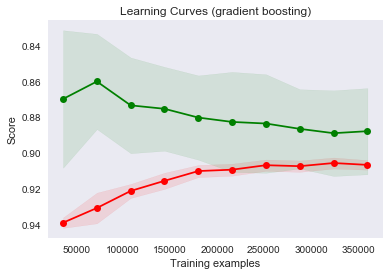

In [113]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
  
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    models['Traininf_sizes']=train_sizes
    models['GB_training_score']=train_scores_mean
    models['GB_validation_score']=test_scores_mean
    
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    return plt


#digits = load_digits()
X=z.head(400000)
Y=b.head(400000)

title = "Learning Curves (gradient boosting)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=50, test_size=0.3, random_state=0)
mdl=GradientBoostingRegressor(criterion= 'mse',
max_depth= 6,
min_weight_fraction_leaf= 0,
n_estimators=19)
#estimator = GaussianNB()

#from sklearn.ensemble import GradientBoostingRegressor
#mdl = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
#plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(mdl, title, X, Y,  cv=10, n_jobs=4)

#plt.show()#
#plt.draw()
#plt.show()
#plt.gca().invert_yaxis()

### Inference:High bias couldnt fit the training data well

In [119]:
models

,Traininf_sizes,GB_training_score,GB_validation_score,XG_training_score,XG_validation_score,DT_training_score,DT_validation_score
1,36000,0.938949,0.869923,0.932909,0.918341,0.974330,0.678539
2,72000,0.930742,0.860157,0.930982,0.920501,0.965364,0.738296
3,108000,0.921226,0.873479,0.927501,0.921282,0.959425,0.742034
4,144000,0.915584,0.875396,0.926446,0.921646,0.951891,0.806657
5,180000,0.910126,0.880290,0.925646,0.921852,0.946933,0.801762
6,216000,0.909363,0.882723,0.924674,0.922830,0.945283,0.812291
7,252000,0.906865,0.883613,0.923829,0.922666,0.942924,0.830594
8,288000,0.907404,0.886587,0.924324,0.923154,0.942846,0.821452
9,324000,0.905648,0.889002,0.924216,0.923364,0.942403,0.853715
10,360000,0.906690,0.887887,0.923248,0.923313,0.941641,0.852993


#### Inference: There is high variance in the graph i.e Gradient boosting couldnt fit the training data well and  test data 

### plotting tarining error and validation error for iterative training size(XGBoost)

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\Users\bhadra\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

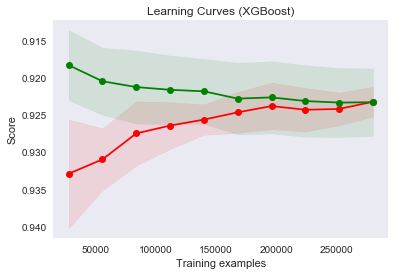

In [116]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from xgboost.sklearn import XGBRegressor

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    models['XG_training_score']=train_scores_mean
    models['XG_validation_score']=test_scores_mean
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    return plt


#digits = load_digits()
X=z.head(400000)
Y=b.head(400000)

title = "Learning Curves (XGBoost)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

#estimator = GaussianNB()

mdl = XGBRegressor()
#from sklearn.ensemble import GradientBoostingRegressor
#mdl = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
#plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#plt.show()#
#plt.draw()
#plt.show()
#plt.gca().invert_yaxis()

#### Inference :High bias couldnt fit the traing data well

#### ploting tarining error and validation error for iterative training size(Decision tree)

Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\Users\bhadra\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

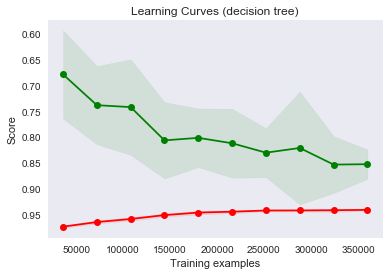

In [118]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
dtsizes=[]
dterror=[]


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    models['DT_training_score']=train_scores_mean
    models['DT_validation_score']=test_scores_mean
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    #dtsizes=[]
   
    dterror.append(train_scores_mean)
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    return plt


#digits = load_digits()
X=z.head(400000)
Y=b.head(400000)

title = "Learning Curves (decision tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
mdl=tree.DecisionTreeRegressor( criterion= 'mse',
max_depth= 11,
max_features=4,
min_samples_split= 2)
#estimator = GaussianNB()

#from sklearn.ensemble import GradientBoostingRegressor
#mdl = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
#plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(mdl, title, X, Y,  cv=10, n_jobs=4)

#plt.show()#
#plt.draw()
#plt.show()
#plt.gca().invert_yaxis()

#### Inference:Low bias and low variance fits the training data well

### Preprocessing(2)

#### Modelling: Hyperparameter optimization and building a learning curve

#### Randomized search cv for XGBoost

In [50]:
from xgboost.sklearn import XGBRegressor  
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

xgbreg = XGBRegressor()  
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(x,y)  
##gs.best_model_  
  


RandomizedSearchCV(cv=None, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002C7356D8>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000010FFDF28>, 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002C714550>, 'colsampl...000002C735198>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002C585E48>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [51]:
##gs.best_model_  
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.932
Best parameters set:
	colsample_bytree: 0.97002074494115831
	gamma: 2.5424436033909616
	learning_rate: 0.30352415567392893
	max_depth: 36
	min_child_weight: 22.482500745418683
	n_estimators: 32
	reg_alpha: 62.877553870151793
	subsample: 0.95313255385927564


Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\Users\bhadra\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

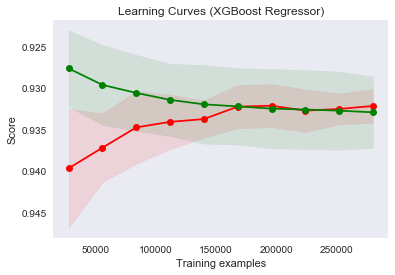

In [124]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from xgboost.sklearn import XGBRegressor

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    models['PRE-XG_training_score']=train_scores_mean
    models['PRE-XG_validation_score']=test_scores_mean
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    postXGboostsizes=[]
    postXGboostsizes=train_sizes
    postXGboosterror=[]
    postXGboosterror=train_scores_mean
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    return plt


#digits = load_digits()
X=x.head(400000)
Y=y.head(400000)

title = "Learning Curves (XGBoost Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

#estimator = GaussianNB()

mdl = XGBRegressor()
#from sklearn.ensemble import GradientBoostingRegressor
#mdl = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
#plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#plt.show()#
#plt.draw()
#plt.show()
#plt.gca().invert_yaxis()

In [31]:
mdl = XGBRegressor(colsample_bytree=0.92819206184455949,
gamma=8.3038540017119917,
learning_rate=0.29144551777424782,
max_depth=25,
min_child_weight=7.047364892962463,
n_estimators= 24,
reg_alpha=55.507794508999318,
subsample=0.92507481625075028)
mdl.fit(features_train,labels_train)
predicted=mdl.predict(features_test)

from sklearn.metrics import explained_variance_score

explained_variance_score(predicted, labels_test)

0.96759785000164245

#### Inference: High bias(undefitting) the model couldnt fit the traing data well

#### Randomized search cv for DecisionTree

In [53]:

from sklearn import tree

 
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
           "criterion"          :['mse','friedman_mse'],
           "max_features"      : st.randint(3, 5),
           "max_depth"         : st.randint(10, 20),
           "min_samples_split" : st.randint(2, 4) 
   
}

xgbreg = tree.DecisionTreeRegressor()
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(xgbreg, params, n_jobs=1)  
gs.fit(x,y)  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000025FCD4E0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000001CBA99E8>, 'criterion': ['mse', 'friedman_mse'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000025FCDAC8>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring=None, verbose=0)

In [54]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.873
Best parameters set:
	criterion: 'mse'
	max_depth: 10
	max_features: 4
	min_samples_split: 2


Automatically created module for IPython interactive environment


<module 'matplotlib.pyplot' from 'C:\Users\bhadra\Anaconda2\lib\site-packages\matplotlib\pyplot.pyc'>

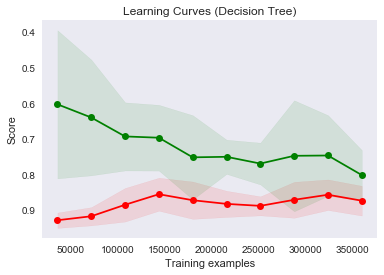

In [126]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

abc=[]
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 10)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    train_sizes, train_scores, test_scores = learning_curve(
        mdl, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    models['PRE-DT_training_score']=train_scores_mean
    models['PRE-DT_validation_score']=test_scores_mean
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
   
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    return plt


#digits = load_digits()
X=x.head(400000)
Y=y.head(400000)

title = "Learning Curves (Decision Tree)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)
mdl=tree.DecisionTreeRegressor( criterion= 'friedman_mse',
max_depth= 10,
max_features=2,
min_samples_split= 2,
splitter='best')
#estimator = GaussianNB()

#from sklearn.ensemble import GradientBoostingRegressor
#mdl = GradientBoostingRegressor(n_estimators=500, learning_rate=0.5, max_depth=5)
#plot_learning_curve(mdl, title, X, Y,  cv=cv, n_jobs=4)

#title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
#cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
#estimator = SVC(gamma=0.001)
plot_learning_curve(mdl, title, X, Y,  cv=10, n_jobs=4)

#plt.show()#
#plt.draw()
#plt.show()
#plt.gca().invert_yaxis()

In [238]:

mdl=tree.DecisionTreeRegressor( criterion= 'friedman_mse',
max_depth= 10,
max_features=2,
min_samples_split= 2,
splitter='best')
mdl.fit(features_train,labels_train)
predicted=mdl.predict(features_test)

from sklearn.metrics import explained_variance_score

explained_variance_score(predicted, labels_test)

0.7435653522283624

#### Inference:  Low bias and low variance

#### Randomized search cv for GradientBoostingRegressor

In [57]:


from sklearn.ensemble import GradientBoostingRegressor
#clf = GradientBoostingRegressor(n_estimators=100, learning_rate=1.0, max_depth=2)
 
import scipy.stats as st

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)
params={
    "criterion":['mse','friedman_mse'],
    "n_estimators":st.randint(1,20),
    "max_depth":st.randint(1,10),
    "min_weight_fraction_leaf":st.randint(0.0,1),
   
    
}

clf = GradientBoostingRegressor()
from sklearn.model_selection import RandomizedSearchCV

gs = RandomizedSearchCV(clf, params, n_jobs=1)  
gs.fit(x,y)  

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000025FCD898>, 'min_weight_fraction_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000000025FC5DD8>, 'criterion': ['mse', 'friedman_mse'], 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000000002E5D2BE0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_s

In [58]:
print("Best score: %0.3f" % gs.best_score_)
print("Best parameters set:")
best_parameters = gs.best_estimator_.get_params()
for param_name in sorted(params.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.898
Best parameters set:
	criterion: 'friedman_mse'
	max_depth: 9
	min_weight_fraction_leaf: 0
	n_estimators: 19


In [42]:
mdl=GradientBoostingRegressor(criterion= 'friedman_mse',
max_depth= 7,
min_weight_fraction_leaf= 0,
n_estimators= 17)
mdl.fit(features_train,labels_train)
predicted=mdl.predict(features_train)

from sklearn.metrics import explained_variance_score

explained_variance_score(predicted, labels_train)

0.86719146467926311

#### Inference:Low variance and Low bias giving the best model

In [100]:
    
dataxgboost=pd.DataFrame(index=[1,2,3,4,5,6,7,8,9,10])
#dataxgboost['tarining_sizes']=dtsizes
#dataxgboost['training error']=score_validation
#dtsizes

In [136]:
models

,Traininf_sizes,GB_training_score,GB_validation_score,XG_training_score,XG_validation_score,DT_training_score,DT_validation_score,PRE-XG_training_score,PRE-XG_validation_score,PRE-DT_training_score,PRE-DT_validation_score,PRE-GB_training_score,PRE-GB_validation_score
1,36000,0.938949,0.869923,0.932909,0.918341,0.974330,0.678539,0.939708,0.927653,0.928546,0.603014,0.955849,0.917470
2,72000,0.930742,0.860157,0.930982,0.920501,0.965364,0.738296,0.937216,0.929641,0.917360,0.640062,0.952931,0.928347
3,108000,0.921226,0.873479,0.927501,0.921282,0.959425,0.742034,0.934765,0.930603,0.885095,0.693216,0.945282,0.917519
4,144000,0.915584,0.875396,0.926446,0.921646,0.951891,0.806657,0.934099,0.931446,0.855477,0.696852,0.941612,0.926450
5,180000,0.910126,0.880290,0.925646,0.921852,0.946933,0.801762,0.933761,0.931982,0.872313,0.751902,0.937091,0.915866
6,216000,0.909363,0.882723,0.924674,0.922830,0.945283,0.812291,0.932263,0.932237,0.882601,0.750425,0.934848,0.928176
7,252000,0.906865,0.883613,0.923829,0.922666,0.942924,0.830594,0.932149,0.932502,0.888159,0.769422,0.934604,0.927676
8,288000,0.907404,0.886587,0.924324,0.923154,0.942846,0.821452,0.932746,0.932613,0.871183,0.747607,0.933693,0.927858
9,324000,0.905648,0.889002,0.924216,0.923364,0.942403,0.853715,0.932540,0.932747,0.856942,0.746761,0.931455,0.927884
10,360000,0.906690,0.887887,0.923248,0.923313,0.941641,0.852993,0.932181,0.932946,0.873659,0.801691,0.933033,0.927967


### Comparing Models based on pre-processing(1) and pre-processing(2)

### Models---------------Preprocessing 1--------------------Preprocessing 2
###  DecisionTree---------------0.824 --------------------------------0.87
###   GradientBoosting--------0.884---------------------------------- 0.86
###  Xgboost ---------------------0.91-------------------------------------0.96

## We can conclude from the above plots and analysis that "Gradient Boosting Regressor" is the model that performs best compared to other models.
## because the graph has Low bias(no underfitting) and high variance

### Predicting weekly sales for test data

In [224]:
feature_cols=['Store','Dept' , 'IsHoliday', 'Type','Size']#,'prevsales']
test_final=test[feature_cols]
mdl=GradientBoostingRegressor(criterion= 'friedman_mse',
max_depth= 7,
min_weight_fraction_leaf= 0,
n_estimators= 17)
mdl.fit(features_train,labels_train)
prediction=mdl.predict(test_final)
test_final['weekly_sales']=prediction
test_final

C:\Users\bhadra\Anaconda2\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Store,Dept,IsHoliday,Type,Size,weekly_sales
0,1,1,False,1,151315,21025.129363
1,1,1,False,1,151315,21025.129363
2,1,1,False,1,151315,21025.129363
3,1,1,True,1,151315,21025.129363
4,1,1,False,1,151315,21025.129363
5,1,1,False,1,151315,21025.129363
6,1,1,False,1,151315,21025.129363
7,1,1,False,1,151315,21025.129363
8,1,1,True,1,151315,21025.129363
9,1,1,False,1,151315,21025.129363
